In [53]:
import sys
import os
sys.path.append('/root/GanLuo/PullSum_MNIST/code/神经网络实验/MNIST最终实验')
import torch
import numpy as np 
import pandas as pd
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
from torch.optim import Optimizer
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from useful_functions import *
from optimizer import *
from model import *
from MNIST_data_process import *
import matplotlib.pyplot as plt
from tqdm import tqdm
from training import *
from mlxtend.data import mnist_data
from accuracy_compute import *
from data_preparation_easy import *
from data_preparation_hard import *
from new_network_func import *
from search_parameter import *
import optuna

In [59]:
n=20
h_data,y_data,X_test,y_test=prepare_node_20_hard_linear_mix(p1=0.1, seed=42)

In [61]:
I=np.eye(n)
one=np.ones(n)
R=np.outer(one,one)/n
A,C=ring3()

M = 1
A_M = np.linalg.matrix_power(A, M)
n = A.shape[0]
one = np.ones(n)
result = np.dot(one,A_M)
t = np.diag(1/result)
A=A_M
B=A_M@t


show_row(A)
_,__=test_row(A,epochs=1000)
print(f"{_:.4e}, {__:.4e}\n")
show_col(B)

A的第二大特征值: 0.9155783932473737
A的beta: 0.9789040533164065
A的spectral gap: 0.02109594668359349
A的kappa: 2.000000000000004
S_A是: 717.8615396461071 

1.5945e+00, 8.4396e+02

B的第二大特征值: 0.9326909356207016
B的beta: 0.9804168296991277
B的spectral gap: 0.01958317030087231
B的kappa: 1.5714285714285583
S_B是: 663.168912719567 



Training Progress: 100%|██████████| 150/150 [01:35<00:00,  1.57it/s, accuracy=93.5800000000%, epoch=150, loss=0.6647016764]


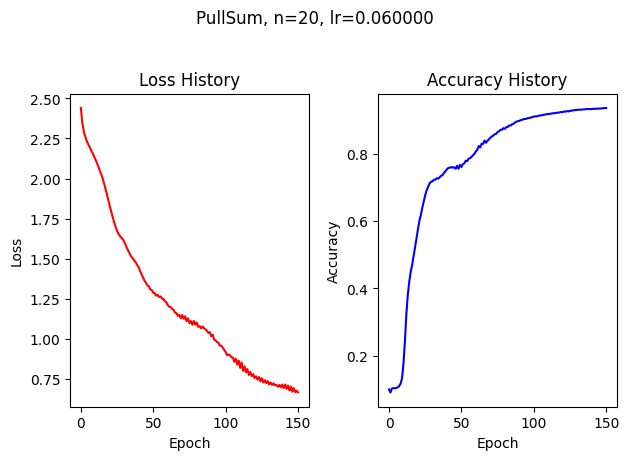

In [62]:
S, S_a1 = train_PullSum(
    n=n,
    A=A,
    B=B,
    model_class=MNISTClassifier_4layer_2,
    seed_for_model=49,
    criterion_class=nn.CrossEntropyLoss,
    epochs=150,
    lr=3e-3,
    X_train_data=h_data,
    y_train_data=y_data,
    X_test_data=X_test,
    y_test_data=y_test,
    compute_accuracy=compute_accuracy_with_average_model,
    show_graph=True
)

In [80]:
I=np.eye(n)
one=np.ones(n)
R=np.outer(one,one)/n
A,C=ring3()

M = 5
A_M = np.linalg.matrix_power(A, M)
n = A.shape[0]
one = np.ones(n)
result = np.dot(one,A_M)
t = np.diag(1/result)
A=A_M
B=A_M@t


show_row(A)
_,__=test_row(A,epochs=1000)
print(f"{_:.4e}, {__:.4e}\n")
show_col(B)

A的第二大特征值: 0.6433949917629261
A的beta: 0.8605262129543512
A的spectral gap: 0.13947378704564883
A的kappa: 2.000000000000001
S_A是: 108.57931864731026 

1.5066e+00, 8.4396e+02

B的第二大特征值: 0.678673766400406
B的beta: 0.8742438875730812
B的spectral gap: 0.12575611242691875
B的kappa: 1.3351478073024823
S_B是: 91.68176364540095 



Training Progress: 100%|██████████| 150/150 [01:36<00:00,  1.55it/s, accuracy=85.9800000000%, epoch=150, loss=0.8313051432]


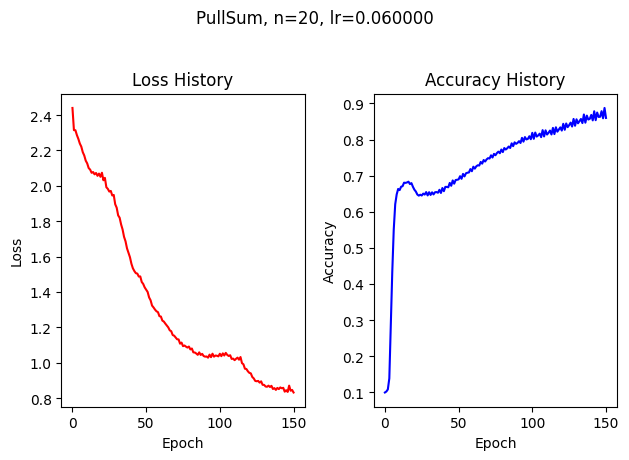

In [64]:
S, S_a2 = train_PullSum(
    n=n,
    A=A,
    B=B,
    model_class=MNISTClassifier_4layer_2,
    seed_for_model=49,
    criterion_class=nn.CrossEntropyLoss,
    epochs=150,
    lr=3e-3,
    X_train_data=h_data,
    y_train_data=y_data,
    X_test_data=X_test,
    y_test_data=y_test,
    compute_accuracy=compute_accuracy_with_average_model,
    show_graph=True
)

Training Progress: 100%|██████████| 150/150 [01:36<00:00,  1.55it/s, accuracy=90.2500000000%, epoch=150, loss=0.8839701653]


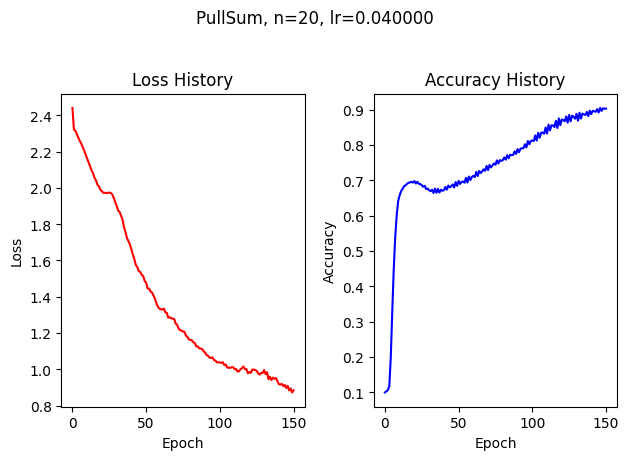

In [70]:
S, S_a22 = train_PullSum(
    n=n,
    A=A,
    B=B,
    model_class=MNISTClassifier_4layer_2,
    seed_for_model=49,
    criterion_class=nn.CrossEntropyLoss,
    epochs=150,
    lr=2e-3,
    X_train_data=h_data,
    y_train_data=y_data,
    X_test_data=X_test,
    y_test_data=y_test,
    compute_accuracy=compute_accuracy_with_average_model,
    show_graph=True
)

Training Progress: 100%|██████████| 150/150 [01:35<00:00,  1.57it/s, accuracy=87.2100000000%, epoch=150, loss=1.0317776889]


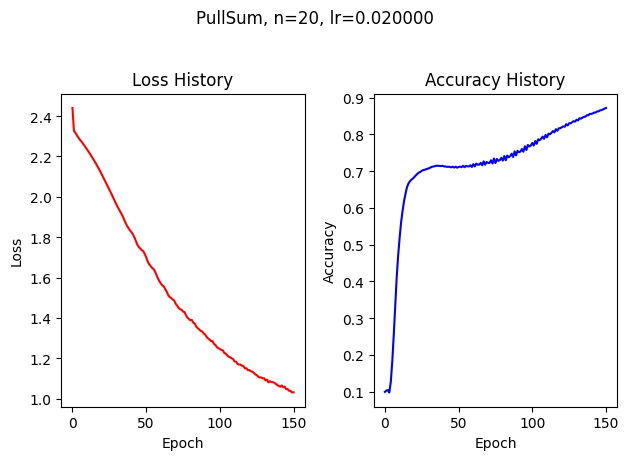

In [71]:
S, S_a23 = train_PullSum(
    n=n,
    A=A,
    B=B,
    model_class=MNISTClassifier_4layer_2,
    seed_for_model=49,
    criterion_class=nn.CrossEntropyLoss,
    epochs=150,
    lr=1e-3,
    X_train_data=h_data,
    y_train_data=y_data,
    X_test_data=X_test,
    y_test_data=y_test,
    compute_accuracy=compute_accuracy_with_average_model,
    show_graph=True
)

Training Progress: 100%|██████████| 150/150 [01:40<00:00,  1.50it/s, accuracy=85.5700000000%, epoch=150, loss=1.0627277881]


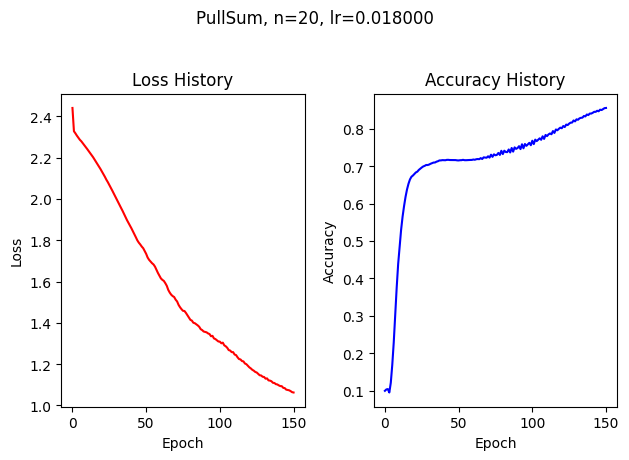

In [81]:
S, S_a24 = train_PullSum(
    n=n,
    A=A,
    B=B,
    model_class=MNISTClassifier_4layer_2,
    seed_for_model=49,
    criterion_class=nn.CrossEntropyLoss,
    epochs=150,
    lr=9e-4,
    X_train_data=h_data,
    y_train_data=y_data,
    X_test_data=X_test,
    y_test_data=y_test,
    compute_accuracy=compute_accuracy_with_average_model,
    show_graph=True
)

Training Progress: 100%|██████████| 150/150 [01:36<00:00,  1.55it/s, accuracy=84.8600000000%, epoch=150, loss=0.8931527287]


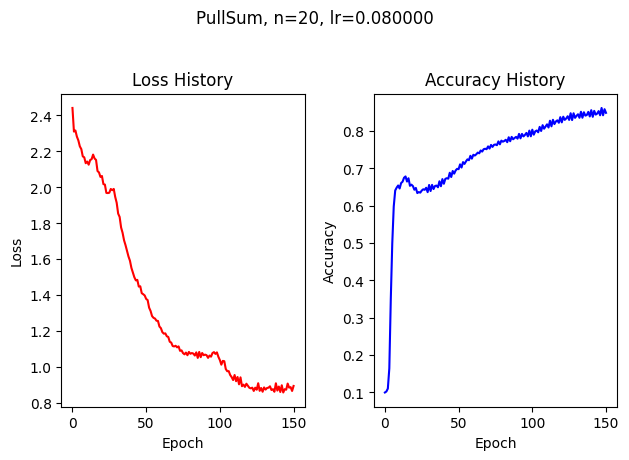

In [83]:
S, S_a25 = train_PullSum(
    n=n,
    A=A,
    B=B,
    model_class=MNISTClassifier_4layer_2,
    seed_for_model=49,
    criterion_class=nn.CrossEntropyLoss,
    epochs=150,
    lr=4e-3,
    X_train_data=h_data,
    y_train_data=y_data,
    X_test_data=X_test,
    y_test_data=y_test,
    compute_accuracy=compute_accuracy_with_average_model,
    show_graph=True
)

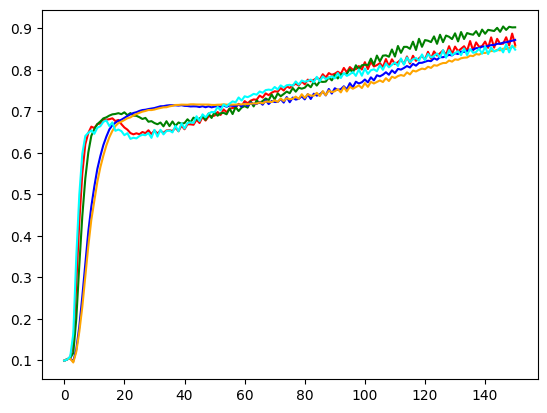

In [84]:
plt.plot(S_a2,color='r')
plt.plot(S_a22,color='g')
plt.plot(S_a23,color='b')
plt.plot(S_a24,color='orange')
plt.plot(S_a25,color='cyan')
plt.show()

In [72]:
I=np.eye(n)
one=np.ones(n)
R=np.outer(one,one)/n
A,C=ring3()

M = 10
A_M = np.linalg.matrix_power(A, M)
n = A.shape[0]
one = np.ones(n)
result = np.dot(one,A_M)
t = np.diag(1/result)
A=A_M
B=A_M@t


show_row(A)
_,__=test_row(A,epochs=1000)
print(f"{_:.4e}, {__:.4e}\n")
show_col(B)

A的第二大特征值: 0.41395711542561714
A的beta: 0.6296496734742495
A的spectral gap: 0.3703503265257505
A的kappa: 2.000000000000001
S_A是: 40.890928620589825 

1.4251e+00, 8.4396e+02

B的第二大特征值: 0.4432686724794375
B的beta: 0.6594285087720638
B的spectral gap: 0.3405714912279362
B的kappa: 1.1984379368118585
S_B是: 31.01655671429131 



Training Progress: 100%|██████████| 150/150 [01:35<00:00,  1.57it/s, accuracy=90.8200000000%, epoch=150, loss=0.8476523161]


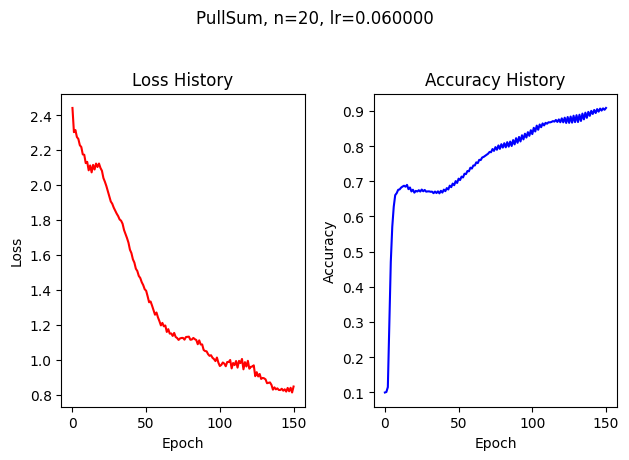

In [66]:
S, S_a3 = train_PullSum(
    n=n,
    A=A,
    B=B,
    model_class=MNISTClassifier_4layer_2,
    seed_for_model=49,
    criterion_class=nn.CrossEntropyLoss,
    epochs=150,
    lr=3e-3,
    X_train_data=h_data,
    y_train_data=y_data,
    X_test_data=X_test,
    y_test_data=y_test,
    compute_accuracy=compute_accuracy_with_average_model,
    show_graph=True
)

Training Progress: 100%|██████████| 150/150 [01:35<00:00,  1.56it/s, accuracy=91.5800000000%, epoch=150, loss=0.8318436563]


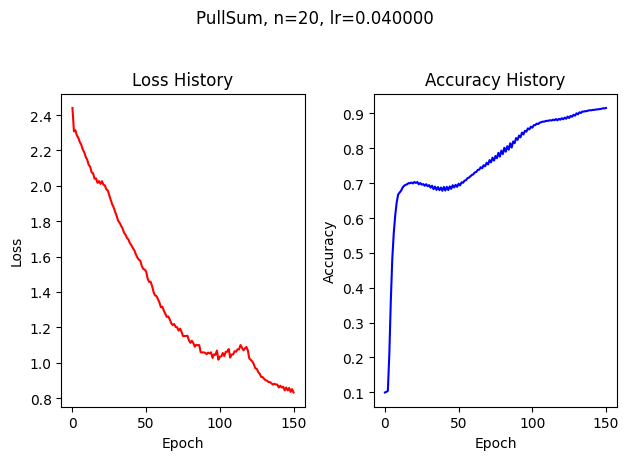

In [73]:
S, S_a32 = train_PullSum(
    n=n,
    A=A,
    B=B,
    model_class=MNISTClassifier_4layer_2,
    seed_for_model=49,
    criterion_class=nn.CrossEntropyLoss,
    epochs=150,
    lr=2e-3,
    X_train_data=h_data,
    y_train_data=y_data,
    X_test_data=X_test,
    y_test_data=y_test,
    compute_accuracy=compute_accuracy_with_average_model,
    show_graph=True
)

Training Progress: 100%|██████████| 150/150 [01:37<00:00,  1.54it/s, accuracy=87.4400000000%, epoch=150, loss=1.0138159335]


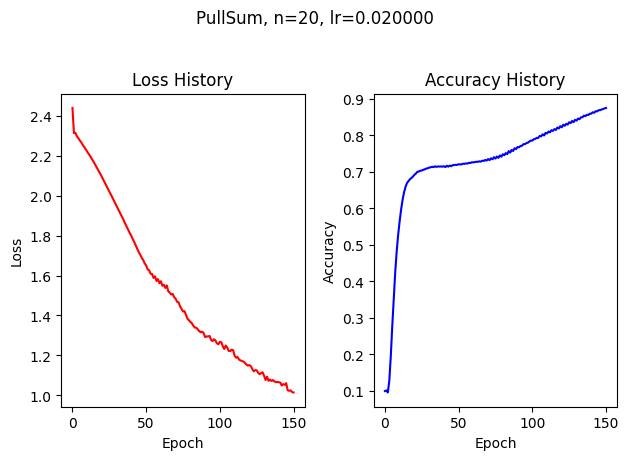

In [74]:
S, S_a33 = train_PullSum(
    n=n,
    A=A,
    B=B,
    model_class=MNISTClassifier_4layer_2,
    seed_for_model=49,
    criterion_class=nn.CrossEntropyLoss,
    epochs=150,
    lr=1e-3,
    X_train_data=h_data,
    y_train_data=y_data,
    X_test_data=X_test,
    y_test_data=y_test,
    compute_accuracy=compute_accuracy_with_average_model,
    show_graph=True
)

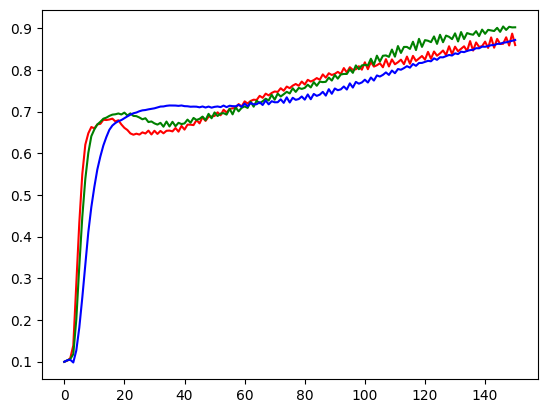

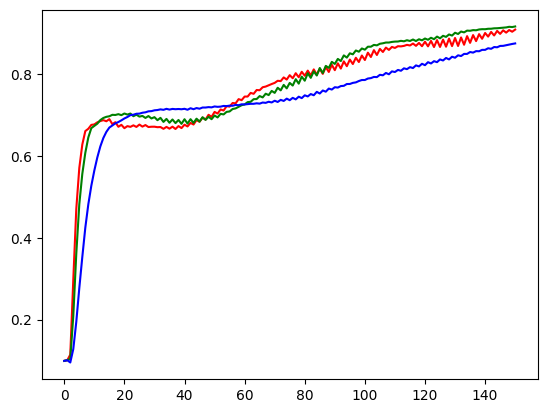

In [75]:
plt.plot(S_a2,color='r')
plt.plot(S_a22,color='g')
plt.plot(S_a23,color='b')
plt.show()

plt.plot(S_a3,color='r')
plt.plot(S_a32,color='g')
plt.plot(S_a33,color='b')
plt.show()

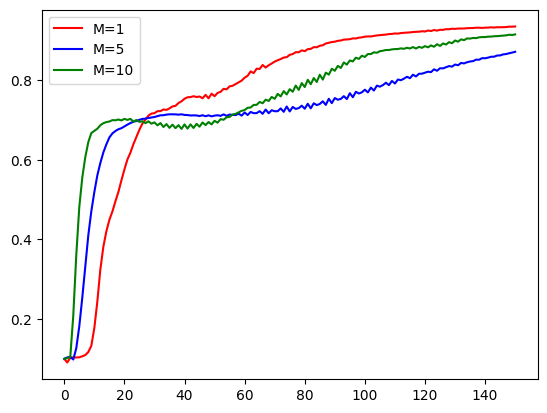

In [96]:
plt.plot(S_a1,color='r',label='M=1')
plt.plot(S_a23,color='b',label='M=5')
plt.plot(S_a32,color='g',label='M=10')
plt.legend()
plt.show()